In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
# Load dataset
df = pd.read_csv("ecommerce_dataset.csv", sep=";")
df

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12/11/2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09/02/2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01/09/2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01/04/2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27/09/2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14/05/2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19/11/2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07/08/2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21/05/2024


In [3]:
# Menghapus data yang tidak relevan
df.drop(columns=['User_ID', 'Product_ID'], inplace=True)
print("Kolom setelah penghapusan data yang tidak relevan:")
print(df.columns)

Kolom setelah penghapusan data yang tidak relevan:
Index(['Category', 'Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)',
       'Payment_Method', 'Purchase_Date'],
      dtype='object')


In [16]:
df

,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,5,36.53,15,31.05,3,12/11/2024
1,2,232.79,20,186.23,3,09/02/2024
2,5,317.02,25,237.76,1,01/09/2024
3,6,173.19,25,129.89,4,01/04/2024
4,0,244.80,20,195.84,3,27/09/2024
...,...,...,...,...,...,...
3655,0,486.79,0,486.79,4,14/05/2024
3656,6,212.87,15,180.94,0,19/11/2024
3657,4,389.76,0,389.76,3,07/08/2024
3658,3,447.66,30,313.36,4,21/05/2024


In [8]:
# Label Encoding untuk Payment_Method
le_payment = LabelEncoder()
df['Payment_Method'] = le_payment.fit_transform(df['Payment_Method'])

le_category = LabelEncoder()
df['Category'] = le_category.fit_transform(df['Category'])

print("Nilai unik dalam Payment_Method setelah encoding:")
print(df['Payment_Method'].unique())
print("Nilai unik dalam Category setelah encoding:")
print(df['Category'].unique())

Nilai unik dalam Payment_Method setelah encoding:
[3 1 4 0 2]
Nilai unik dalam Category setelah encoding:
[5 2 6 0 1 4 3]


In [9]:
# Feature Selection
selected_features = ['Category', 'Price (Rs.)', 'Discount (%)']
X = df[selected_features]
y = df['Payment_Method']

In [10]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Pembentukan Model Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
# Analisis Akurasi Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Akurasi: 0.19
Precision: 0.13
Recall: 0.19
F1-score: 0.11


In [14]:
# Pengujian Model
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Perbandingan nilai aktual dan prediksi:")
print(comparison.head())

Perbandingan nilai aktual dan prediksi:
      Actual  Predicted
291        0          4
270        2          1
149        3          1
1188       1          1
2037       2          4


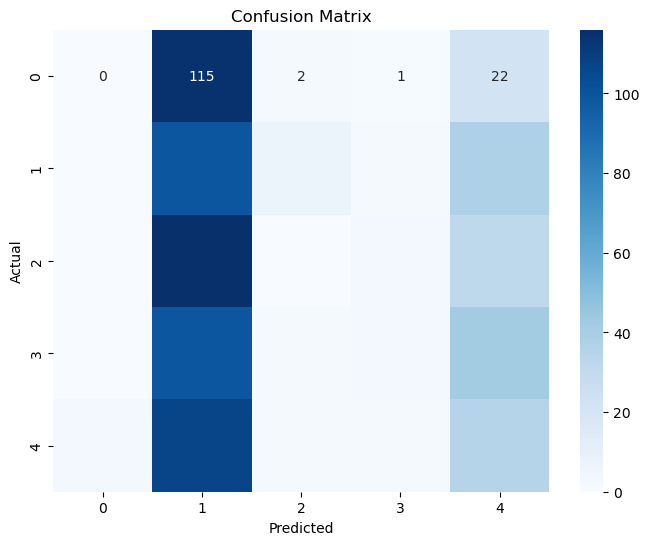

In [15]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_payment.classes_, yticklabels=le_payment.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()